### Перераспределение маркетингового бюждета между различными источниками трафика для Яндекс.Афиши

##### В данном исследовании представленно 3 таблицы с данными о посещениях сайта, информацией о заказах и информацией о затратах на маркетинг:<br>

1. /datasets/visits_log.csv - лог сервера с информацией о посещениях сайта:
    * Uid — уникальный идентификатор пользователя
    * Device — категория устройства пользователя
    * Start Ts — дата и время начала сессии
    * End Ts — дата и время окончания сессии
    * Source Id — идентификатор рекламного источника, из которого пришел пользователь<br>
2. /datasets/orders_log.csv - информация о заказах:
    * Uid — уникальный id пользователя, который сделал заказ
    * Buy Ts — дата и время заказа
    * Revenue — выручка Яндекс.Афиши с этого заказа<br>
3. /datasets/costs.csv - информация о затратах на маркетинг:
    * source_id — идентификатор рекламного источника
    * dt — дата
    * costs — затраты на этот рекламный источник в этот день


##### Разделим исследование на несколько частей:

##### Часть 1. Изучение общей информации и приведение данных к нужным типам:
[1. Загрузка библиотек, Изученеие файла с данными, получение общей информации, приведение дынных к нужным типам.](#Section1.1)

##### Часть 2.  Построение отчёов и расчет метрик:
1. Изучение данных о продукте:
    * [Сколько людей пользуются в день, неделю, месяц?](#Section2.1.1)
    * [Сколько сессий в день?](#Section2.1.2)
    * [Сколько длится одна сессия?](#Section2.1.3)
    * [Как часто люди возвращаются?](#Section2.1.4)
______________________________________________    
    
2. Изучение данных о продажах:
    * [Когда люди начинают покупать?](#Section2.2.1)
    * [Сколько раз покупают за период?](#Section2.2.2)
    * [Какой средний чек?](#Section2.2.3)
    * [Сколько денег приносят? (LTV)](#Section2.2.4)
    
_______________________________________________   

3. Изучение данных о затратах на маркетинг:
    * [Сколько денег потратили? Всего / на каждый источник / по времени](#Section2.3.1)
    * [Сколько стоило привлечение одного покупателя из каждого источника?](#Section2.3.2)
    * [На сколько окупились расходы? (ROI)](#Section2.3.3)
   
____________________________________________

[Общий вывод.](#Section3)

### Часть 1.  Изучение общей информации и приведение данных к нужным типам:

<a id='Section1.1'></a>
##### Загрузка библиотек, изученеие файла с данными, получение общей информации, приведение дынных к нужным типам

In [1]:
#Загрузка библиотек:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Чтение файлов:
visits = pd.read_csv(r'C:\Users\user\Desktop\analytics\projects\Яндекс.Афиша\visits_log.csv')
orders = pd.read_csv(r'C:\Users\user\Desktop\analytics\projects\Яндекс.Афиша\orders_log.csv')
costs = pd.read_csv(r'C:\Users\user\Desktop\analytics\projects\Яндекс.Афиша\costs.csv')

In [3]:
#Вывод и изучение информации о таблицу visits:
display(visits.head())
visits.info()
#Переименуем столбцы:
visits.columns = ['device','end_ts','source_id','start_ts','uid']
#Приведем столбцы с датами к типу datetime:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'],format='%Y-%m-%d %H:%M:%S')
#Проверяем наличие дубликатов:
print('Количество дубликатов:', visits.duplicated().sum())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
Количество дубликатов: 0


In [4]:
#Вывод и изучение информации о таблицу orders:
display(orders.head())
orders.info()
#Переименуем столбцы:
orders.columns = ['buy_ts','revenue','uid']
#Приведем столбцы с датами к типу datetime:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
#Проверяем наличие дубликатов:
print('Количество дубликатов:', orders.duplicated().sum())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
Количество дубликатов: 0


In [5]:
#Вывод и изучение информации о таблицу cots:
display(costs.head())
costs.info()
#Приведем столбцы с датами к типу datetime:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Часть 2. Построение отчёов и расчет метрик:


#### 1. Изучение данных о продукте:

<a id = 'Section2.1.1'></a>
<b>Расчет количества пользователей в день, неделю, месяц:</b>

In [6]:
#Создадим столбцы c днем, номером недели, месяцем, годом и датой сессии в таблице visits:
visits['date'] = visits['start_ts'].dt.date.astype('datetime64')
visits['day'] = visits['date'].dt.day
visits['week'] = visits['date'].dt.week
visits['month'] = visits['date'].dt.month
visits['year'] = visits['date'].dt.year
#Расчет пользовательских метрик общий:
def dau_wau(data):
    dau = round(data.groupby('date', as_index = False)['uid'].nunique().mean())
    wau = round(data.groupby(['year','week'], as_index = False)['uid'].nunique().mean())
    mau = round(data.groupby(['year','month'], as_index = False)['uid'].nunique().mean())
    print('Среднее количество пользователей в день: ', dau)
    print('Среднее количество пользователей в неделю: ', wau)
    print('Среднее количество пользователей в месяц: ', mau)
#Расчет Sticky factor:   
    s_f_w = dau/wau
    s_f_m = dau/mau
    print('Sticky factor(week) = {:.0%}'.format(s_f_w))
    print('Sticky factor(month) = {:.0%}'.format(s_f_m))
dau_wau(visits)




Среднее количество пользователей в день:  908
Среднее количество пользователей в неделю:  5716
Среднее количество пользователей в месяц:  23228
Sticky factor(week) = 16%
Sticky factor(month) = 4%


<b>По источникам:</b>

,source_id,daily_avg_user_activity
0,1,81
1,2,121
2,3,233
3,4,275
4,5,176
5,6,1
6,7,1
7,9,36
8,10,26


,source_id,weekly_avg_user_activity
0,1,463
1,2,716
2,3,1566
3,4,1829
4,5,1167
5,6,1
6,7,1
7,9,239
8,10,167


,source_id,monthly_avg_user_activity
0,1,1819
1,2,2752
2,3,6759
3,4,7766
4,5,5018
5,6,1
6,7,3
7,9,987
8,10,707


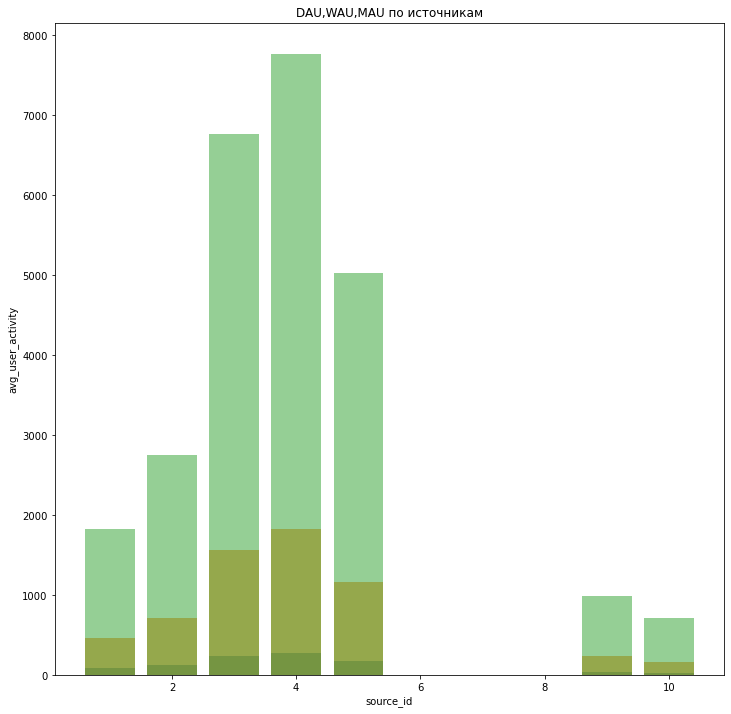

In [7]:
#DAU по источникам
def user_activity_calculation(column,name):
    dau = visits.pivot_table(index = 'date', columns = column, values = 'uid', aggfunc = 'nunique')
    wau = visits.pivot_table(index = ['year','week'], columns = column, values = 'uid', aggfunc = 'nunique')
    mau = visits.pivot_table(index = ['year','month'], columns = column, values = 'uid', aggfunc = 'nunique')
    daily_avg_user_activity = dau.mean(axis = 0).round().astype('int')
    weekly_avg_user_activity = wau.mean(axis = 0).round().astype('int')
    monthly_avg_user_activity = mau.mean(axis = 0).round().astype('int')
    daily_avg_user_activity = daily_avg_user_activity.to_frame(name = 'daily_avg_user_activity').reset_index()
    weekly_avg_user_activity = weekly_avg_user_activity.to_frame(name = 'weekly_avg_user_activity').reset_index()
    monthly_avg_user_activity = monthly_avg_user_activity.to_frame(name = 'monthly_avg_user_activity').reset_index()
    display(daily_avg_user_activity)
    display(weekly_avg_user_activity)
    display(monthly_avg_user_activity)
    x1 = daily_avg_user_activity[column]
   # x2 = weekly_avg_user_activity[column]
   # x3 = monthly_avg_user_activity[column]
    y1 = daily_avg_user_activity['daily_avg_user_activity']
    y2 = weekly_avg_user_activity['weekly_avg_user_activity']
    y3 = monthly_avg_user_activity['monthly_avg_user_activity']
    
    fig, ax = plt.subplots()
    ax.bar(x1,y1, alpha=0.7)
    ax.bar(x1,y2,alpha=0.6)
    ax.bar(x1,y3, alpha=0.5)
    ax.set(title = name, xlabel = column, ylabel = 'avg_user_activity')
    fig.set_figwidth(12)    
    fig.set_figheight(12)

    plt.show()

    
user_activity_calculation('source_id','DAU,WAU,MAU по источникам')

<b>По устройствам:</b>

,device,daily_avg_user_activity
0,desktop,659
1,touch,253


,device,weekly_avg_user_activity
0,desktop,4130
1,touch,1635


,device,monthly_avg_user_activity
0,desktop,16725
1,touch,6826


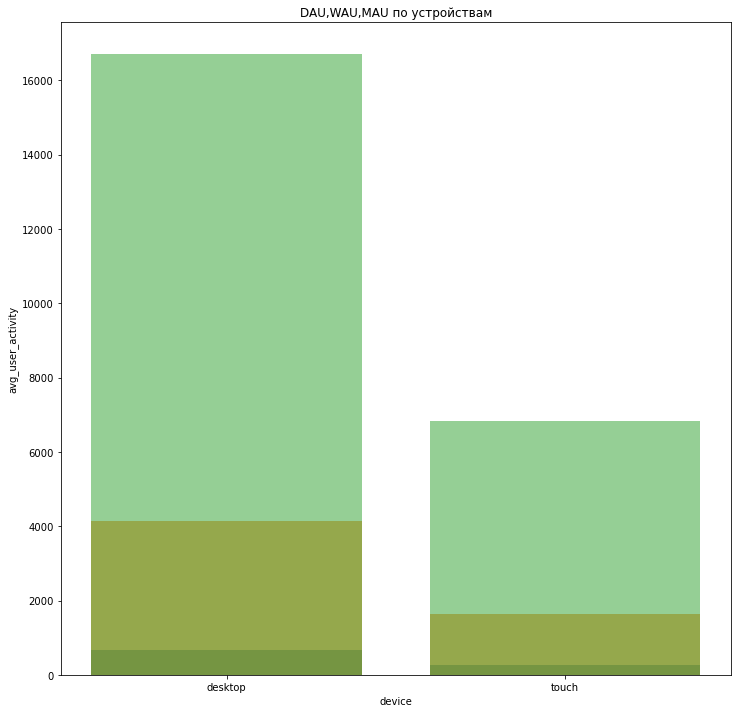

In [8]:
#DAU по устройствам:
user_activity_calculation('device','DAU,WAU,MAU по устройствам')

### Вывод:
Из расчетов пользовательской активности и графиков видны следующие закономерности:
1. Наиболее эффективные рекламные источники под номерами 3, 4, 5. Все три метрики(DAU, WAU, MAU) по этим источникам выше, чем по остальным.
2. С компьютеров посещений совершается присерно в 2.5 раза больше, чем с мобильных устройств. 

<a id = 'Section2.1.2'></a>
<b>Расчет количества сессий в день:</b>

In [9]:
#Создадим столбец с длительностью сессии:
def sessions_amount(column):
    visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
    sessions_per_day = visits.loc[visits['duration'] > 0].groupby(column).agg({'uid' : ['count','nunique']})
    sessions_per_day.columns = ['n_sessions','n_users']
    sessions_per_day['sess_per_user'] = sessions_per_day['n_sessions']/sessions_per_day['n_users']
    return sessions_per_day
    
total_sessions_per_day =  sessions_amount('date')
display(total_sessions_per_day)
print('Среднее количество сессий в день на одного пользователя: ',round(total_sessions_per_day['sess_per_user'].mean()))

,n_sessions,n_users,sess_per_user
date,,,
2017-06-01,599,547,1.095064
2017-06-02,596,549,1.085610
2017-06-03,429,400,1.072500
2017-06-04,447,416,1.074519
2017-06-05,807,738,1.093496
...,...,...,...
2018-05-27,582,537,1.083799
2018-05-28,1041,936,1.112179
2018-05-29,942,863,1.091541


Среднее количество сессий в день на одного пользователя:  1


<b>По источникам:</b>

In [10]:
sessions_per_source = sessions_amount(['source_id','date']) 
sessions_per_source = sessions_per_source.reset_index()
avg_session_per_source = sessions_per_source.groupby('source_id')['sess_per_user'].mean().round().astype('int')
display(avg_session_per_source)

source_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
9     1
10    1
Name: sess_per_user, dtype: int32

<b>По устройствам:</b>

In [11]:
sessions_per_device =  sessions_amount(['device','date']) 
avg_sessions_per_device =  sessions_per_device.groupby('device')['sess_per_user'].mean().round().astype('int')
display(avg_sessions_per_device)

device
desktop    1
touch      1
Name: sess_per_user, dtype: int32

### Вывод:
Как видно из расчетов, среднее количество сессий в день равно 1, независимо от рекламного источника или устройства, с которого пользователь заходит на сайт.

<a id = 'Section2.1.3'></a>
<b>Расчет ASL:</b>

In [12]:
#Считаем среднюю продолжительность одной сессии:
asl_total = visits.loc[visits['duration'] > 0]['duration'].mean()/60
print('Средняя продолжительность одной сессии составляет: {:.0f} минут'.format(asl_total))

Средняя продолжительность одной сессии составляет: 12 минут


<b>По источникам:</b>

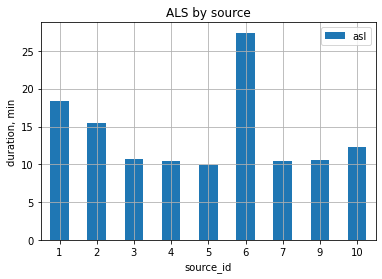

In [13]:
def asl_calculation(column, name):
    asl = visits.loc[visits['duration'] > 0].groupby(column)['duration'].mean().to_frame(name = 'asl')
    asl['asl'] = asl['asl']/60
    asl.reset_index().plot(kind = 'bar', x = column, y = 'asl', grid = True)
    plt.ylabel('duration, min')
    plt.title(name)
    plt.xticks(rotation = 360)
asl_calculation('source_id', 'ALS by source')

<b>По устройствам:</b>

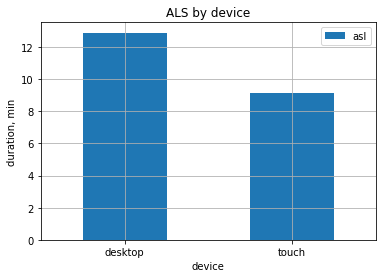

In [14]:
asl_calculation('device', 'ALS by device')

### Вывод:
1. Средняя продолжительность пользовательской сессии составляет 12 мин. 
2. Пользователи, привлеченные 1,2 и 10 рекламными источниками проводят на сайте чуть больше времени, чем другие. Большая средняя продолжительность сессии с источника 6 обьясняется тем, что в этой группе всего 1  пользователь, который провел на сайте 25 мин.

<a id = 'Section2.1.4'></a>
##### Как часто люди возвращаются?

In [15]:
#Выделим дату первой сессии и обьединим таблицы:
first_session_date_by_uid = visits.groupby('uid')['date'].min()
first_session_date_by_uid.name = 'first_session_date'
visits = visits.merge(first_session_date_by_uid.reset_index(), on = 'uid', how = 'left')


In [16]:
#Выделим месяцы сессий из дат:
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
display(visits)

,device,end_ts,source_id,start_ts,uid,date,day,week,month,year,duration,first_session_date,first_session_month,session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,20,51,12,2017,1080,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,19,8,2,2018,1680,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,1,26,7,2017,0,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,20,5,2018,1440,2018-03-09,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,27,52,12,2017,0,2017-12-27,2017-12-01,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,29,30,7,2017,19,2017-07-29,2017-07-01,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,25,4,1,2018,19,2018-01-25,2018-01-01,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,3,9,3,2018,19,2018-03-03,2018-03-01,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2,44,11,2017,19,2017-11-02,2017-11-01,2017-11-01


In [17]:
#Создадим профиль каждого пользователя:
users = (
    visits.sort_values(by = ['uid','start_ts']).groupby('uid')
    .agg({'start_ts': 'first','source_id':'first','device':'first'})
    .rename(columns = {'start_ts':'acquisition_ts'})
)
users['acquisition_date'] = users['acquisition_ts'].dt.date
users['acquisition_month'] = users['acquisition_ts'].astype('datetime64[M]')

costs = costs.rename(columns = {'dt':'acquisition_date'})
users= (
    users.reset_index().set_index(['source_id','acquisition_date'])
   .join(costs.set_index(['source_id','acquisition_date']), how = 'left')
)
users = users.reset_index().set_index('uid')
users.head(10)


,source_id,acquisition_date,acquisition_ts,device,acquisition_month,costs
uid,,,,,,
469568501030474895,1,2017-06-01,2017-06-01 05:30:00,desktop,2017-06-01,75.2
618675438905551322,1,2017-06-01,2017-06-01 02:37:00,touch,2017-06-01,75.2
1074355127080856382,1,2017-06-01,2017-06-01 09:21:00,desktop,2017-06-01,75.2
1292867924428534308,1,2017-06-01,2017-06-01 12:53:00,desktop,2017-06-01,75.2
1548840741623289234,1,2017-06-01,2017-06-01 01:18:00,desktop,2017-06-01,75.2
2050423809815667474,1,2017-06-01,2017-06-01 10:36:00,desktop,2017-06-01,75.2
3520273333047097992,1,2017-06-01,2017-06-01 20:08:00,desktop,2017-06-01,75.2
3644482766749211722,1,2017-06-01,2017-06-01 09:22:00,desktop,2017-06-01,75.2
3963367130094376110,1,2017-06-01,2017-06-01 18:07:00,touch,2017-06-01,75.2


In [18]:
#Считаем стоимость привлечения одного пользователя:
user_cost = users.reset_index().groupby(['source_id', 'acquisition_date']).agg({'uid':'count', 'costs':'mean'})
user_cost.columns = ['n_users','costs']
user_cost['acquisition_cost'] = user_cost['costs']/user_cost['n_users']
user_cost

n_users  costs  acquisition_cost
source_id acquisition_date                                  
1         2017-06-01             47  75.20          1.600000
          2017-06-02             27  62.25          2.305556
          2017-06-03             22  36.53          1.660455
          2017-06-04             23  55.00          2.391304
          2017-06-05             39  57.08          1.463590
...                             ...    ...               ...
10        2018-05-27              5   9.92          1.984000
          2018-05-28             34  21.26          0.625294
          2018-05-29             23  11.32          0.492174
          2018-05-30             54  33.15          0.613889
          2018-05-31             99  17.60          0.177778

[2568 rows x 3 columns]

In [19]:
#Добавляем стоимость привлечения пользователя к таблице users:
users = users.reset_index().set_index(['source_id','acquisition_date']).join(user_cost[['acquisition_cost']], how = 'left')
users = (
    users.reset_index()
    .set_index('uid')[['acquisition_ts','acquisition_date','acquisition_month','source_id','device','acquisition_cost']]
)
users.head(20)

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,1.6
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,1.6
3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01,1,desktop,1.6
3963367130094376110,2017-06-01 18:07:00,2017-06-01,2017-06-01,1,touch,1.6


In [20]:
#Cоздадим таблицу профиля пользователя + все сессии пользователя:
all_sessions = visits.set_index('uid')[['start_ts','session_month']].join(users , how = 'left')
all_sessions.head(20)

,start_ts,session_month,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost
uid,,,,,,,,
9223535092787691177,2017-11-14 20:00:00,2017-11-01,2017-11-14 08:54:00,2017-11-14,2017-11-01,1,touch,1.628421
9223535092787691177,2017-11-14 08:54:00,2017-11-01,2017-11-14 08:54:00,2017-11-14,2017-11-01,1,touch,1.628421
9223535092787691177,2017-11-14 10:30:00,2017-11-01,2017-11-14 08:54:00,2017-11-14,2017-11-01,1,touch,1.628421
9223696655126052404,2017-11-05 17:08:00,2017-11-01,2017-11-05 17:08:00,2017-11-05,2017-11-01,3,touch,1.676636
9223707061355654945,2017-10-31 22:36:00,2017-10-01,2017-10-31 22:36:00,2017-10-31,2017-10-01,9,touch,1.907778
9223707061355654945,2017-11-02 20:24:00,2017-11-01,2017-10-31 22:36:00,2017-10-31,2017-10-01,9,touch,1.907778
9223717650969886679,2017-11-04 14:02:00,2017-11-01,2017-11-04 14:02:00,2017-11-04,2017-11-01,4,desktop,0.900512
9223728001958725072,2017-10-18 15:28:00,2017-10-01,2017-10-18 15:28:00,2017-10-18,2017-10-01,4,desktop,0.435443
9223742998947856887,2017-11-24 01:58:00,2017-11-01,2017-11-24 01:58:00,2017-11-24,2017-11-01,3,desktop,2.429728


In [21]:
#Считаем lifetime когорты:
all_sessions['cohort_lifetime'] = (
    ((all_sessions['session_month'] - all_sessions['acquisition_month'])/ np.timedelta64(1,'M'))
    .round().astype('int')
)
all_sessions = all_sessions.reset_index()

In [22]:
#Считаем количество активных пользователей в когорте по месяцам:
cohorts = all_sessions.groupby(['acquisition_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
#Посчитаем изначальное число пользователей в когорте:
initial_users = all_sessions.query('cohort_lifetime == 0').groupby('acquisition_month')['uid'].nunique()
initial_users.name = 'initial_users'
cohorts = cohorts.join(initial_users, on = 'acquisition_month', how = 'left')
#Расчитаем Retention Rate:
cohorts['retention'] = cohorts['uid']/cohorts['initial_users']
#Сводная таблица с RR:
retention_pivot = cohorts.pivot_table(index='acquisition_month',columns='cohort_lifetime',values='retention') 

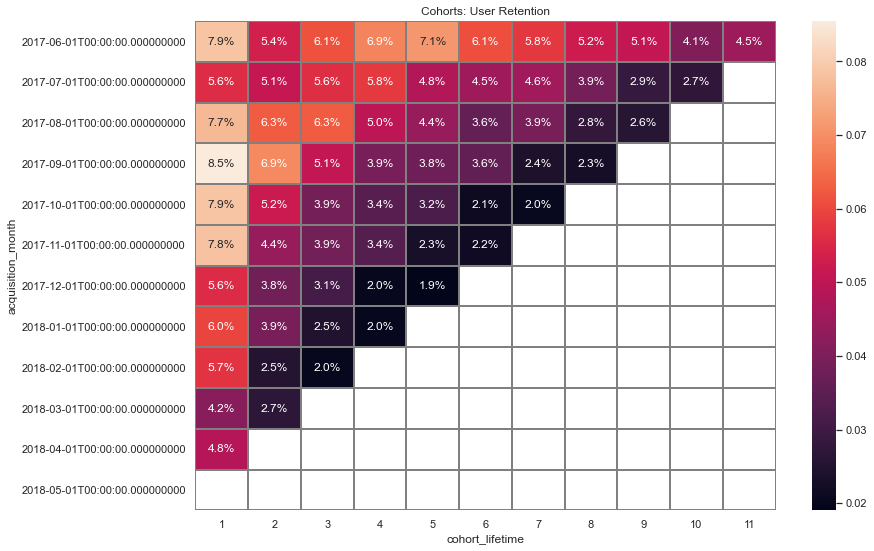

In [23]:
# Строим heatmap:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.drop([0], axis = 1), annot=True, fmt='.1%', linewidths=1, linecolor='gray')

<b>Retention Rate по устройствам:</b>

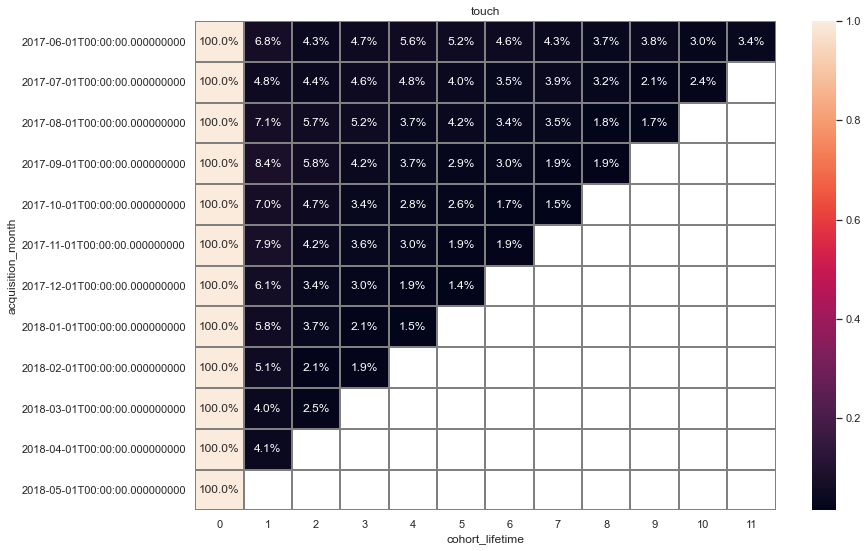

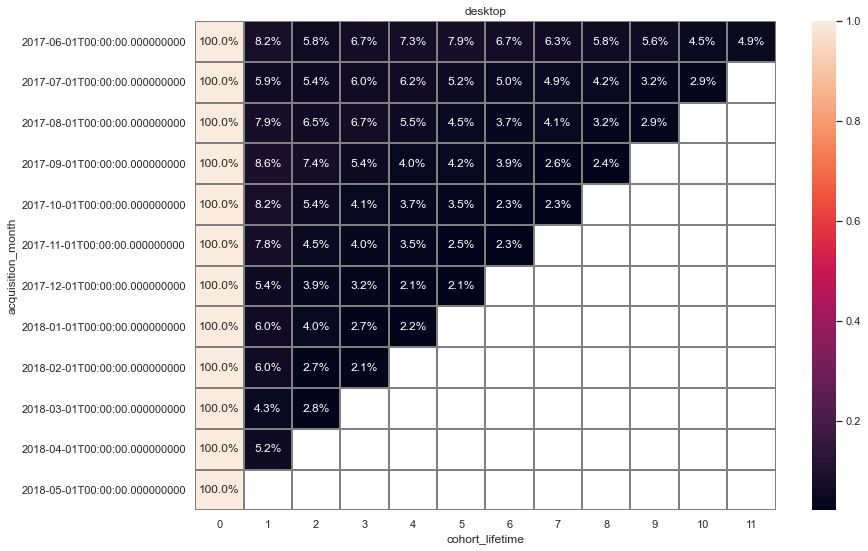

In [24]:
#Посчитаем RR по устройствам:
def retention_rate(data):
    
    all_sessions_by_feature = data
    #Считаем количество активных пользователей в когорте по месяцам:
    cohorts_by_feature = all_sessions_by_feature.groupby(['acquisition_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
     #Посчитаем изначальное число пользователей в когорте:
    initial_users_by_feature = all_sessions_by_feature.query('cohort_lifetime == 0').groupby('acquisition_month')['uid'].nunique()
    initial_users_by_feature.name = 'initial_users_by_feature'
    cohorts_by_feature = cohorts_by_feature.join(initial_users_by_feature, on = 'acquisition_month', how = 'left')
    #Расчитаем Retention Rate:
    cohorts_by_feature['retention'] = cohorts_by_feature['uid']/cohorts_by_feature['initial_users_by_feature']
    #Сводная таблица с RR:
    retention_pivot_by_feature = cohorts_by_feature.pivot_table(index='acquisition_month',columns='cohort_lifetime',values='retention') 
    # Строим heatmap:
   
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title(name)
    sns.heatmap(retention_pivot_by_feature, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

for name in all_sessions['device'].unique():    
    retention_rate(all_sessions.query('device == @name'))   

<b>Retention Rate по источникам:</b>

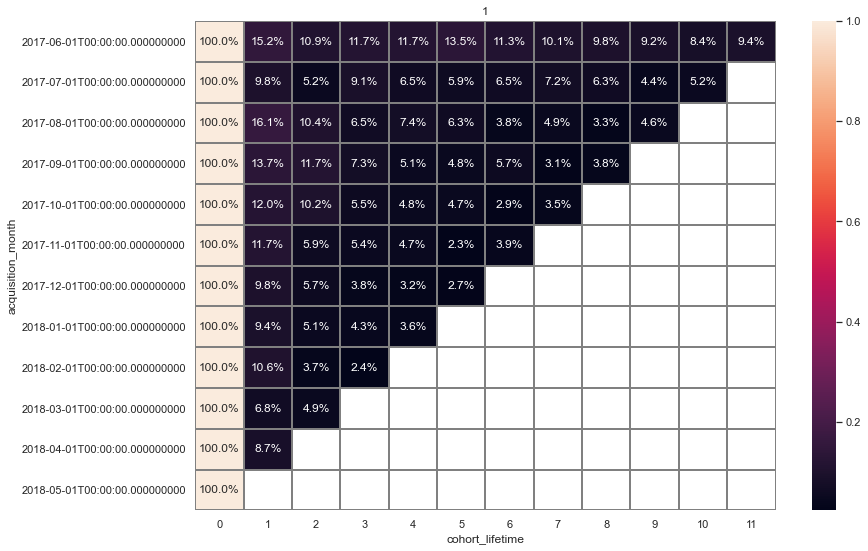

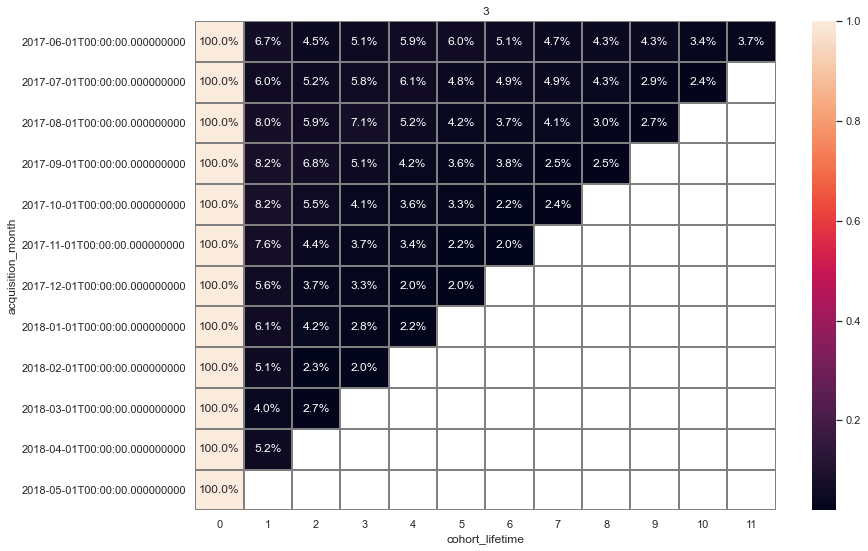

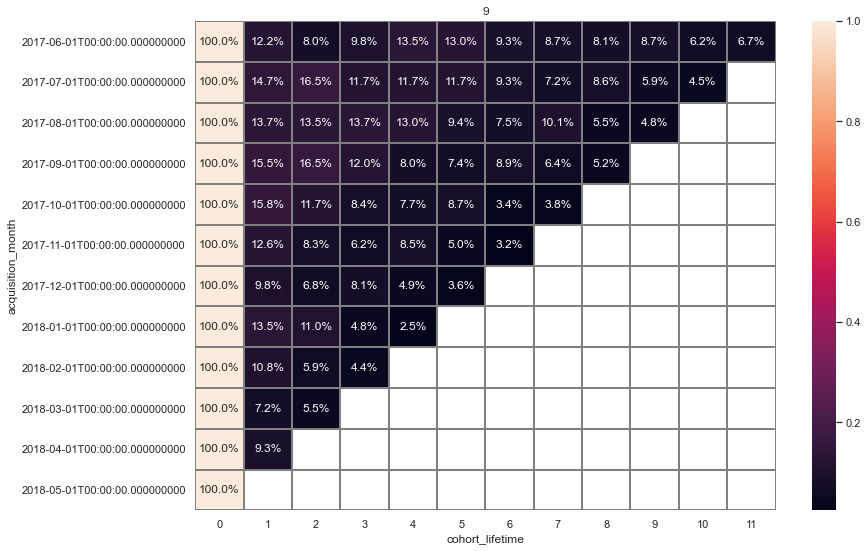

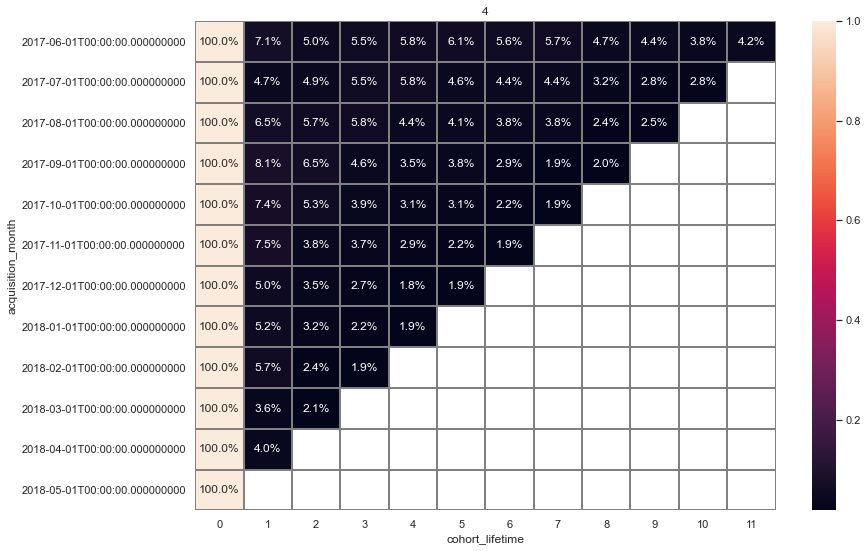

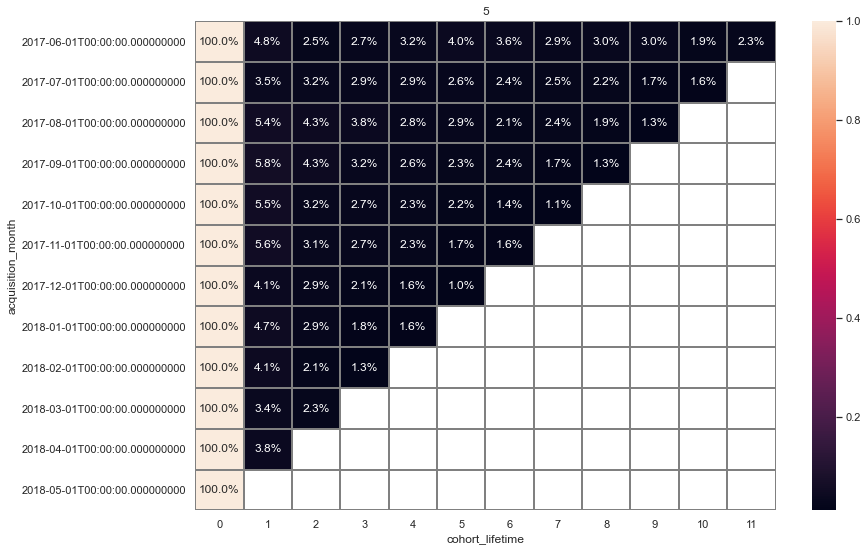

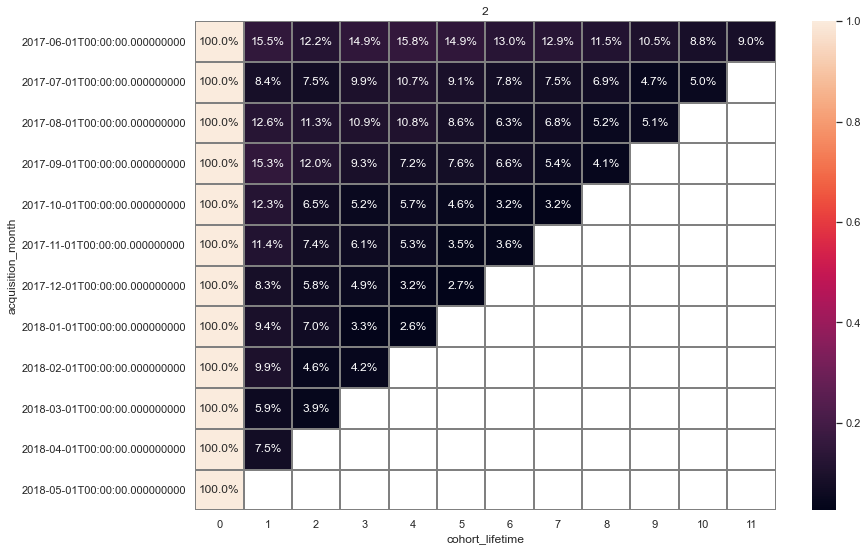

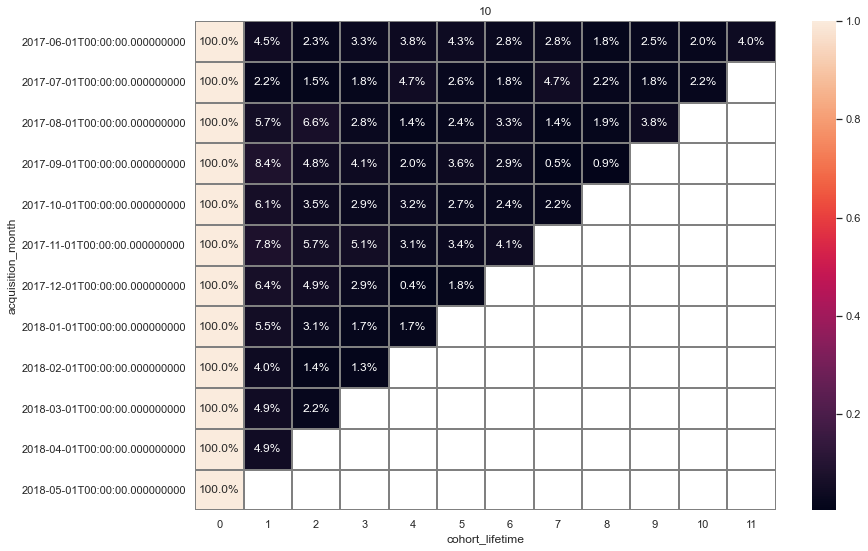

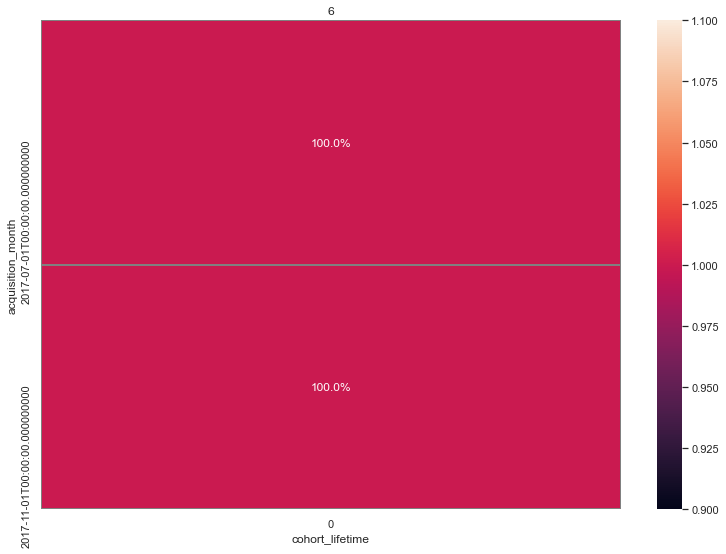

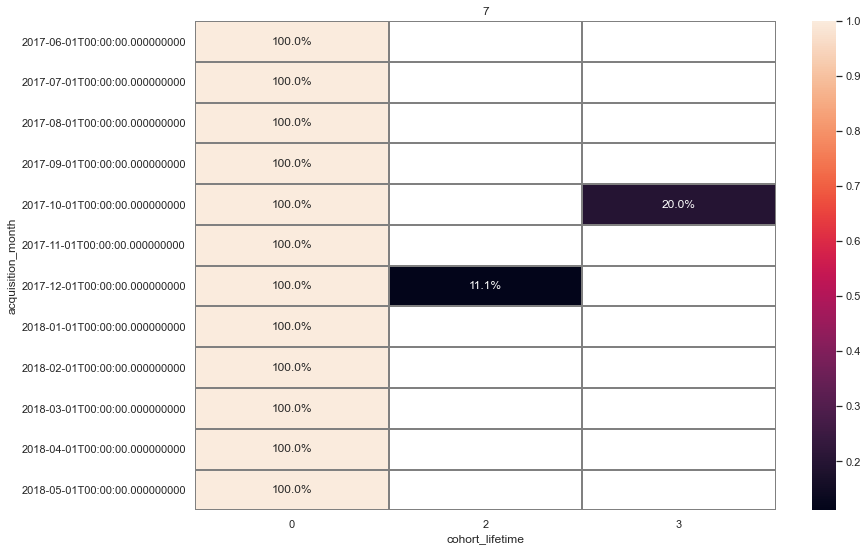

In [25]:
for name in all_sessions['source_id'].unique():    
    retention_rate(all_sessions.query('source_id == @name'))  

### Вывод:
1. Retention Rate по всем когортам на следующий после первого визита месяц очень невысокий и падает с течением времени.На следующий месяц после первого визита RR самый высокий в когорте 09.2017, а самый низкий - 03,04.2018. Я думаю, это связано со спецификой продукта Афиши. Люди менее склонны посещать культурные мероприятия, когда на улице становится теплее))
2. RR практически не зависит от  используемого устройства, однако в случае с desktop он все же немного выше. Возможно, это связано с тем, что во время первой сессии люди, использующие  desktop более полно изучили возможности приложения и сделали вывод, что билеты покупать удобнее именно там. </br>
Так же видно, что в когорте 06.2017 RR наиболее высокий, наименее медленно падает с течением времени. Когорта 09.2017  - RR cамый высокий в первый месяц жизни, но падает быстрее, чем в когорте 06.2017.
3. Самый высокий RR наблюдаем среди пользователей, привлеченных 1, 2 и 9 рекламными источниками. Количество привлеченных ими юзеров невысокое. Возмоно, стоит обратить на эти источники внимание маркетологов.<br>
6, 7 источники можно не брать во внимание в связи с минимальным количеством пользователей. <br>
Среди лидеров по количеству привлеченных пользователей RR самый высокий у 4 источника.<br>
Во всех случаях RR наиболее высокий в когортах 09, 10 и 11 месяцов. Это может быть связано с тем, что осенью начинается театральный сезон, все любители театра спешат смотреть новые постановки.


<b>2. Изучение данных о продажах:</b>

<a id = 'Section2.2.1'> </a>
##### Расчет времени, прошедшего с момента первого визита на сайт до первой покупки:

In [26]:
#Дата и время первой покупки:
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
#Создаем таблицу с датой и временем первого визита на сайт и первой покупки:
first_visit_order_delta = first_order.join(visits.groupby('uid')['start_ts'].min(), how = 'left', on = 'uid')
display(first_visit_order_delta)

,uid,buy_ts,start_ts
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00


In [27]:
#Считаем разницу между временем первого визита и временем первоой покупки в минутах:
first_visit_order_delta['minutes_before_order'] =(
    ((first_visit_order_delta['buy_ts'] -  first_visit_order_delta['start_ts']).dt.seconds / 60)
    .astype('int')
)
first_visit_order_delta['minutes_before_order'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: minutes_before_order, dtype: float64

Cреднее время между первым визитом и первой покупкой составляет: 16 мин


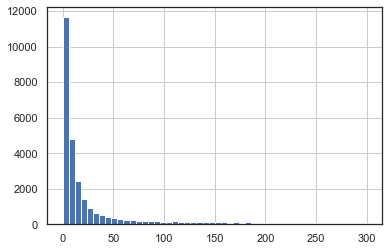

In [28]:
#Строим гистограмму распределения разницы во времени покупки и первого визита:
first_visit_order_delta['minutes_before_order'].hist(bins = 50, range = (0,300))
print(
    'Cреднее время между первым визитом и первой покупкой составляет: {} мин'
    .format(round(first_visit_order_delta['minutes_before_order']
    .median()))
)

<a id = 'Section2.2.2'></a>
##### Сколько раз покупают за период?

In [29]:
#Выделим столбец с месяцем покупки:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
#Считаем количество заказов на пользователя в месяц:
orders_per_user = orders.groupby('order_month').agg({'uid':['count','nunique']})
orders_per_user.columns = ['n_orders','n_users']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_users']
display(orders_per_user)
print('Среднее количество заказов в месяц на пользователя: {}'.format(round(orders_per_user['orders_per_user'].mean())))


,n_orders,n_users,orders_per_user
order_month,,,
2017-06-01,2354,2023,1.163618
2017-07-01,2363,1984,1.191028
2017-08-01,1807,1472,1.227582
2017-09-01,3387,2750,1.231636
2017-10-01,5679,4675,1.214759
2017-11-01,5659,4547,1.244557
2017-12-01,6218,4942,1.258195
2018-01-01,4721,3898,1.211134
2018-02-01,5281,4258,1.240254


Среднее количество заказов в месяц на пользователя: 1


<a id = 'Section2.2.3'></a>
##### Какой средний чек?

In [30]:
revenue_per_order = orders.groupby('order_month').agg({'revenue':['sum','count']})
revenue_per_order.columns = ['total_revenue', 'n_orders']
revenue_per_order['revenue_per_order'] = revenue_per_order['total_revenue'] / revenue_per_order['n_orders'] 
display(revenue_per_order)
print('Средний чек составил: {}'.format(round(revenue_per_order['revenue_per_order'].mean(),2) ))

,total_revenue,n_orders,revenue_per_order
order_month,,,
2017-06-01,9557.49,2354,4.060106
2017-07-01,12539.47,2363,5.306589
2017-08-01,8758.78,1807,4.847139
2017-09-01,18345.51,3387,5.416448
2017-10-01,27987.70,5679,4.928280
2017-11-01,27069.93,5659,4.783518
2017-12-01,36388.60,6218,5.852139
2018-01-01,19417.13,4721,4.112927
2018-02-01,25560.54,5281,4.840095


Средний чек составил: 4.84


<a id = 'Section2.2.4'></a>
##### Сколько денег приносят? (LTV)

In [31]:
#Смотрим месяц первого заказа каждого пользователя:
first_order_month = orders.groupby('uid')['order_month'].min().reset_index()
first_order_month.columns = ['uid','first_order_month']

In [32]:
#Добавим месяц первого заказа в таблицу с заказами:
new_orders = orders.join(first_order_month.set_index('uid'), how = 'left', on = 'uid')
display(new_orders)

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


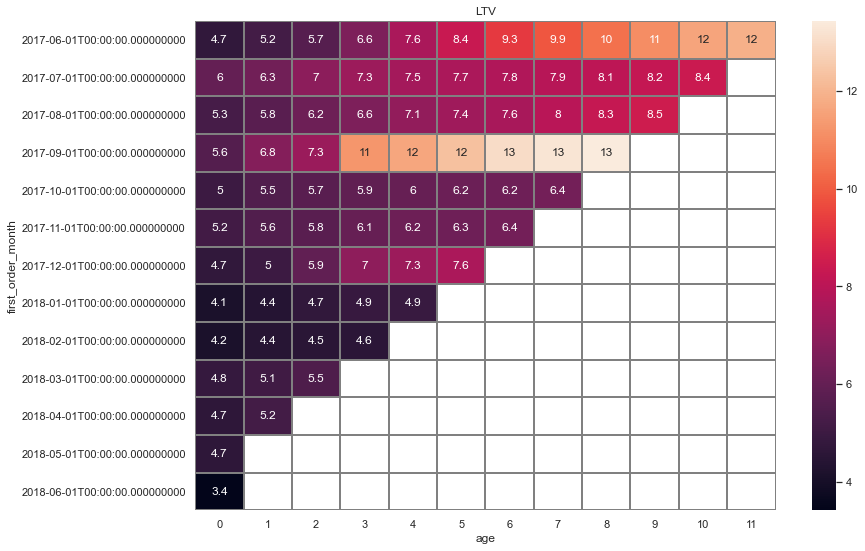

In [33]:
users_orders_ltv = new_orders.set_index('uid').join(users, how = 'left')

users_orders_ltv['age'] =((users_orders_ltv['order_month'] - users_orders_ltv['first_order_month'])/np.timedelta64(1, 'M')).round().astype('int')
#Считаем размер когорт:
cohort_size = users_orders_ltv.reset_index().groupby('first_order_month')['uid'].nunique().reset_index()
cohort_size.columns = ['first_order_month', 'n_buyers']
users_orders_ltv = users_orders_ltv.reset_index().set_index('first_order_month').join(cohort_size.set_index('first_order_month'), how = 'left')

#Считаем выручку по когортам и age:
total_revenue = users_orders_ltv.groupby(['first_order_month','age'])['revenue'].sum()
total_revenue.name = 'cohort_revenue'
report = users_orders_ltv.reset_index().set_index(['first_order_month','age']).join(total_revenue, how = 'left')
#Считаем LTV
report['ltv'] = report['cohort_revenue']/report['n_buyers']
report = report.reset_index()
report_pivot  = report.pivot_table(index = 'first_order_month',columns = 'age', values = 'ltv', aggfunc = 'mean').round(2).cumsum(axis = 1)


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(report_pivot, annot=True,  linewidths=1, linecolor='gray')


### Вывод:
1. Наибольшее количество средств принесли пользователи когорт 06.2017 и 09.2017.
2. Наихудшие показатели наблюдаются у когорт 01.2018, 02.2018 и 06.2018.
3. Имеется тенденция снижения LTV по каждой следующей когорте.

### LTV  по устройствам:

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


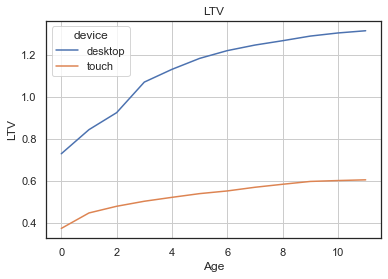

In [34]:
def ltv(dimensions):
    #Строим когорты:
    cohorts = users.groupby(dimensions).agg({'source_id':'count','acquisition_cost':'sum'})
    cohorts.columns = ['cohort_size','acquisition_cost']
    #Считаем LTV:
    ltv = orders.set_index('uid').join(users, how = 'left')[['acquisition_month', 'source_id', 'device', 'order_month', 'revenue']]
    ltv['age_month'] = ((ltv['order_month'] - ltv['acquisition_month']) / np.timedelta64(1,'M')).round().astype('int')
    ltv = ltv.groupby(dimensions + ['age_month']).agg({'revenue':'sum'})
    ltv = pd.pivot_table(ltv, index = dimensions, columns = 'age_month', values = 'revenue', aggfunc ='sum' ).cumsum(axis = 1)
    ltv = cohorts[['cohort_size']].join(ltv)
    ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = ['cohort_size'])
    ltv.T.plot()
    plt.title('LTV')
    plt.xlabel('Age')
    plt.ylabel('LTV')
    plt.grid(True)

    return ltv
ltv_by_device = ltv(['device'])
ltv_by_device



### Вывод:
Количество средств, принесенное людьми, использующими desktop примерно в 2 раза больше, чем в случае touch.

### LTV по источникам:

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


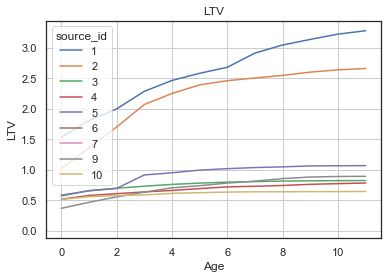

In [35]:
ltv_by_source = ltv(['source_id'])
display(ltv_by_source)


### Вывод:
1. Наиболее высокие показатели LTV у пользователей, привлеченных 1 и 2 рекламными источниками. 
2. Так же можно выделить источник 5. Показатель LTV у него с течением времени растет быстрее, чем у всех остальных(кроме 1 и 2).
3. Самый низкий LTV на 11 месяц жизни у 10 источника

<b>3. Изучение данных о затратах на маркетинг:</b>
   

<a id = 'Section2.3.1'></a>
##### Сколько денег потратили? Всего / на каждый источник / по времени

In [36]:
#Считаем общие расходы:
total_costs = costs['costs'].sum()
print('На маркетинг за период с 2017-06-01 по 2018-05-31 потрачено: ', total_costs)

На маркетинг за период с 2017-06-01 по 2018-05-31 потрачено:  329131.62


In [37]:
#Смотрим, сколько потрачено на каждый источник за весь период:
costs_by_source = costs.groupby('source_id')['costs'].sum()
costs_by_source = costs_by_source.to_frame(name = 'costs_by_source')
costs_by_source .style.background_gradient('OrRd')

,costs_by_source
source_id,
1,20833.270000
2,42806.040000
3,141321.630000
4,61073.600000
5,51757.100000
9,5517.490000
10,5822.490000


In [38]:
#Смотрим ежемесячные расходы в целом:
costs['month'] = costs['acquisition_date'].astype('datetime64[M]')
monthly_costs = costs.groupby('month')['costs'].sum()
monthly_costs = monthly_costs.to_frame(name = 'monthly_costs').reset_index()
monthly_costs.columns = ['first_order_month','monthly_costs']
monthly_costs.style.background_gradient('OrRd')

,first_order_month,monthly_costs
0,2017-06-01 00:00:00,18015.000000
1,2017-07-01 00:00:00,18240.590000
2,2017-08-01 00:00:00,14790.540000
3,2017-09-01 00:00:00,24368.910000
4,2017-10-01 00:00:00,36322.880000
5,2017-11-01 00:00:00,37907.880000
6,2017-12-01 00:00:00,38315.350000
7,2018-01-01 00:00:00,33518.520000
8,2018-02-01 00:00:00,32723.030000
9,2018-03-01 00:00:00,30415.270000


### Вывод:
1. На маркетинг за период с 2017-06-01 по 2018-05-31 потрачено 329131.62
2. Больше всего средств было потрачено на источник 3
3. Наибольшее количество средств было потрачено в 10, 11, 12 месяцах 2017 и 01, 02 2018 года

<a id = 'Section2.3.2'></a>
##### Сколько стоило привлечение одного покупателя из каждого источника?

In [39]:
cohorts = users.groupby('source_id').agg({'source_id':'count','acquisition_cost':'sum'})
cohorts.columns = ['cohort_size','acquisition_cost']
cohorts['cac'] = cohorts['acquisition_cost'] / cohorts['cohort_size']
cohorts.style.background_gradient('OrRd')


,cohort_size,acquisition_cost,cac
source_id,,,
1,9469,20833.270000,2.200155
2,17616,42806.040000,2.429952
3,66116,141321.630000,2.137480
4,72346,61073.600000,0.844188
5,49237,51756.400000,1.051169
6,2,0.000000,0.000000
7,32,0.000000,0.000000
9,6448,5454.420000,0.845909
10,6903,5821.120000,0.843274


### Вывод:
Наиболее высокие затраты на привлечение пользователя пришлись на источника 1, 2 и 3

<a id = 'Section2.3.3'></a>
##### На сколько окупились расходы? 

In [40]:
#Считаем стоимть привлечения одного клиента из каждой когорты: 
report_new = report.set_index('first_order_month').join(monthly_costs.set_index('first_order_month'), how = 'left')
report_new['cac'] = report_new['monthly_costs']/  report_new['n_buyers']
report_new_cac = report_new.groupby('first_order_month')['cac'].mean().round(2)
report_new_cac

first_order_month
2017-06-01     8.91
2017-07-01     9.49
2017-08-01    10.80
2017-09-01     9.44
2017-10-01     8.37
2017-11-01     9.29
2017-12-01     8.74
2018-01-01     9.94
2018-02-01     8.96
2018-03-01     8.61
2018-04-01     9.79
2018-05-01     7.44
2018-06-01      NaN
Name: cac, dtype: float64

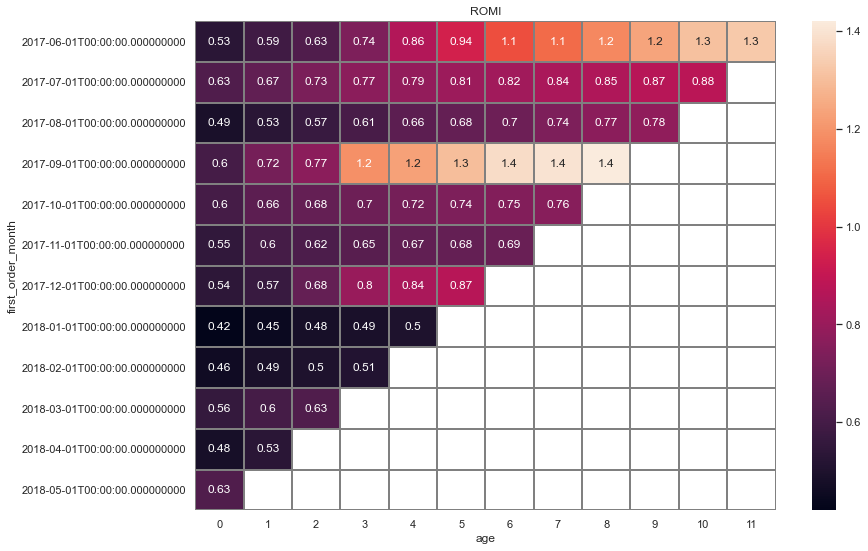

In [41]:
#Считаем ROMI:
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new_romi = (
    report_new.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi', aggfunc = 'mean')
    .cumsum(axis=1).round(2) 
)


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(report_new_romi, annot=True,  linewidths=1, linecolor='gray')


### Вывод:
1. Наиболее быстро окупилась когорта 09.2017г - на 4 мес lifetime. К последнему месяцу жизни изучаемого периода ROMI = 140%
2. Когорта 06.2017 окупилась через 6 мес.
3. Остальные же когорты на изучаемый период не окупились.

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.697297,0.822769,0.908954,1.040228,1.121444,1.174927,1.219778,1.325768,1.385900,1.427633,1.467167,1.492351
2,0.418291,0.559837,0.701083,0.852863,0.927469,0.985270,1.013786,1.032048,1.049610,1.071874,1.087187,1.096191
3,0.266843,0.308693,0.326205,0.342036,0.356107,0.365864,0.373452,0.377555,0.381188,0.383276,0.384664,0.385725
4,0.613237,0.686213,0.721014,0.755086,0.783961,0.819153,0.853220,0.864913,0.880473,0.902840,0.915853,0.928336
5,0.556115,0.622242,0.661176,0.871255,0.905200,0.946823,0.969087,0.986965,0.997461,1.012592,1.015202,1.016764
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.435346,0.551036,0.655912,0.749159,0.832906,0.874366,0.925163,0.961737,1.012340,1.042393,1.053069,1.055914
10,0.610616,0.662642,0.684509,0.697689,0.727260,0.741076,0.753372,0.757834,0.758569,0.761608,0.762951,0.764514


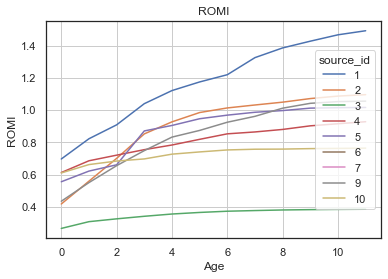

In [42]:
#Считаем ROMI по источникам:
romi_by_source = ltv_by_source.join(cohorts[['cac']], how = 'left')
romi_by_source = romi_by_source.div(romi_by_source['cac'], axis = 0).drop(columns = ['cac'])
display(romi_by_source)
romi_by_source.T.plot()
plt.title('ROMI')
plt.xlabel('Age')
plt.ylabel('ROMI')
plt.grid(True)



### Вывод:
1. 1 источник - лидер по окупаемости на 11 месяц lifetime. Он окупился через 3 месяца.
2. 2 источник окупился через 6 мес
3. 5 и 9 также окупились, но медленнее - на 9 и 8 месяц соответственно.

In [43]:
ROMI_total =( orders['revenue'].sum() / costs['costs'].sum())*100 
print(ROMI_total)

76.58249304639888


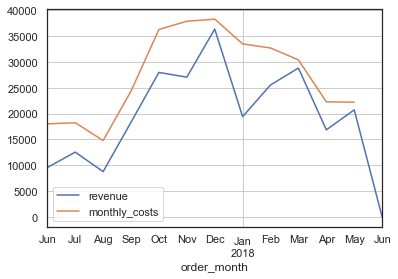

In [44]:
#Построим графики ежемесяных затрат и ежемесячной выручки:
revenue_costs = (
    new_orders.groupby('order_month')['revenue'].sum()
    .to_frame(name = 'revenue').join(monthly_costs.rename(columns = {'first_order_month' : 'order_month'}).set_index('order_month'))
)

revenue_costs.plot()
plt.grid(True)

### Вывод:
Из графика и расчетов  видно, что ежемесячные затраты больше ежемесячной прибыли. Итоговая прибыль на 23% меньше итоговых затрат.

<a id = 'Section3'></a>
### Общий вывод:

1. Наиболее эффективные с точки зрения пользовательской активности рекламные источники под номерами 3, 4, 5. Все три метрики(DAU, WAU, MAU) по этим источникам выше, чем по остальным. 1 и 2 источники также привлекают существенное количество пользователей. 6 и 7 источники не привлекли никого)
2.  Самый высокий RR наблюдаем среди пользователей, привлеченных 1, 2 и 9 рекламными источниками. <br>
6, 7 источники можно не брать во внимание в связи с минимальным количеством пользователей. <br>
Среди лидеров по количеству привлеченных пользователей RR самый высокий у 4 источника.<br>
3. Наиболее высокие показатели LTV у пользователей, привлеченных 1 и 2 рекламными источниками. <br>
Так же можно выделить источник 5. Показатель LTV у него с течением времени растет быстрее, чем у всех остальных(кроме 1 и 2).
Самый низкий LTV на 11 месяц жизни у 10 источника
4. 1 источник - лидер по окупаемости на 11 месяц lifetime. Он окупился через 3 месяца.<br>
2 источник окупился через 6 мес<br>
5 и 9 также окупились, но медленнее - на 9 и 8 месяц соответственно<br>
____________________________________________________
ИТОГ: 
1. 1 и 2 источник приносили значительное количество пользователей и быстро окупились.<br>
2. Несмотря на то, что 3, 4 источники привлекли большое количество пользователей, они  не окупились.
3. 6 и 7 источники не привлекли почти никого.
4. 5 и 9 окупился, но медленно. При этом 5 источник привлек большое количество пользователей, а 9 - нет.
Из всего выше сказанного, я бы порекомендовала делить бюджет между 1 и 2 источниками, так как они наиболее перспективны в плане окупаемости. Следует постараться привлечь ими бОльшее количество пользователей. <br>
Что каксается платформ, то исследование показало, что desktop показывает более высокие результаты по всем посчитанным метрикам.